In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import graphviz
import pydot
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import cv2
import imghdr



C:\Users\gadha\AppData\Local\Temp\ipykernel_10524\4045868923.py:20: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
def plot_images_from_directory(directory_path , class_animal, num_images=9):
    image_filenames = os.listdir(directory_path)

    if len(image_filenames) < num_images:
        print(f"only folund {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    selected_images = random.sample(image_filenames,num_images)

    fig, axes = plt.subplots(3,3, figsize=(8,8))
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

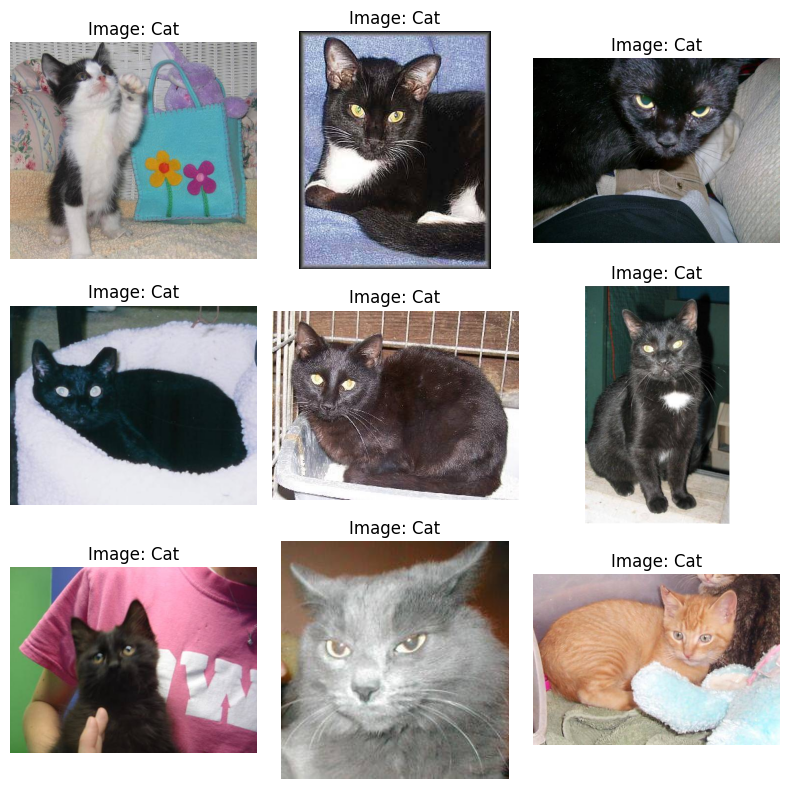

In [3]:
cat_directory_path = ('D:/Emotion Detection CNN/Data/train/cats')
plot_images_from_directory(cat_directory_path,class_animal="Cat")

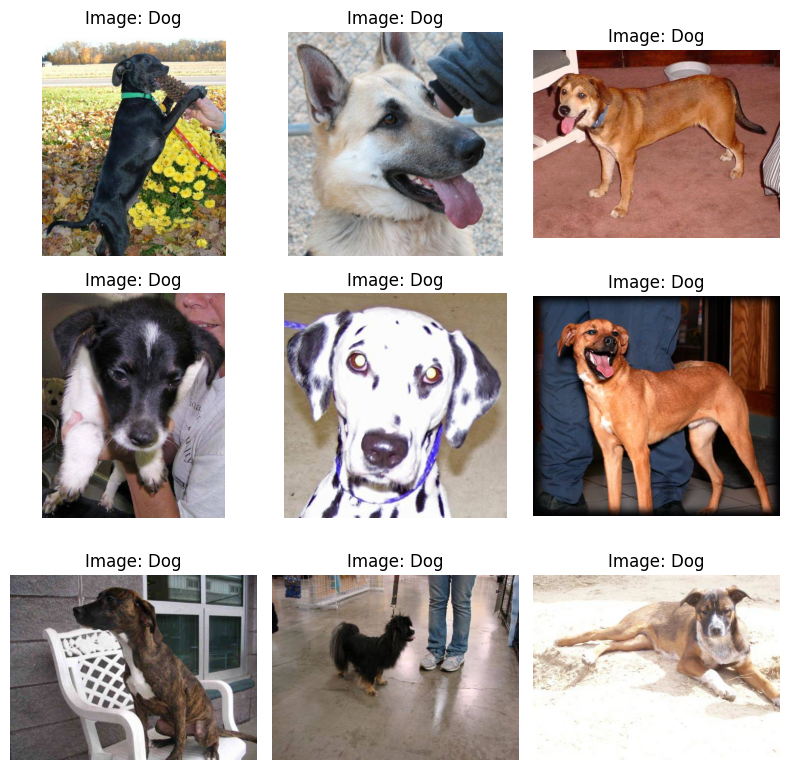

In [4]:
dog_directory_path = ('D:/Emotion Detection CNN/Data/train/dogs')
plot_images_from_directory(dog_directory_path,class_animal="Dog")

The shape of every img is dif as per industry standard we have to have all imag size same for proressing 

In [5]:
# Data Analysis
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animals = ["Cats","Dogs"]
count = [len(cat_images),len(dog_images)]
print(count)

[10000, 10000]


(-1.1, 1.1, -1.1, 1.1)

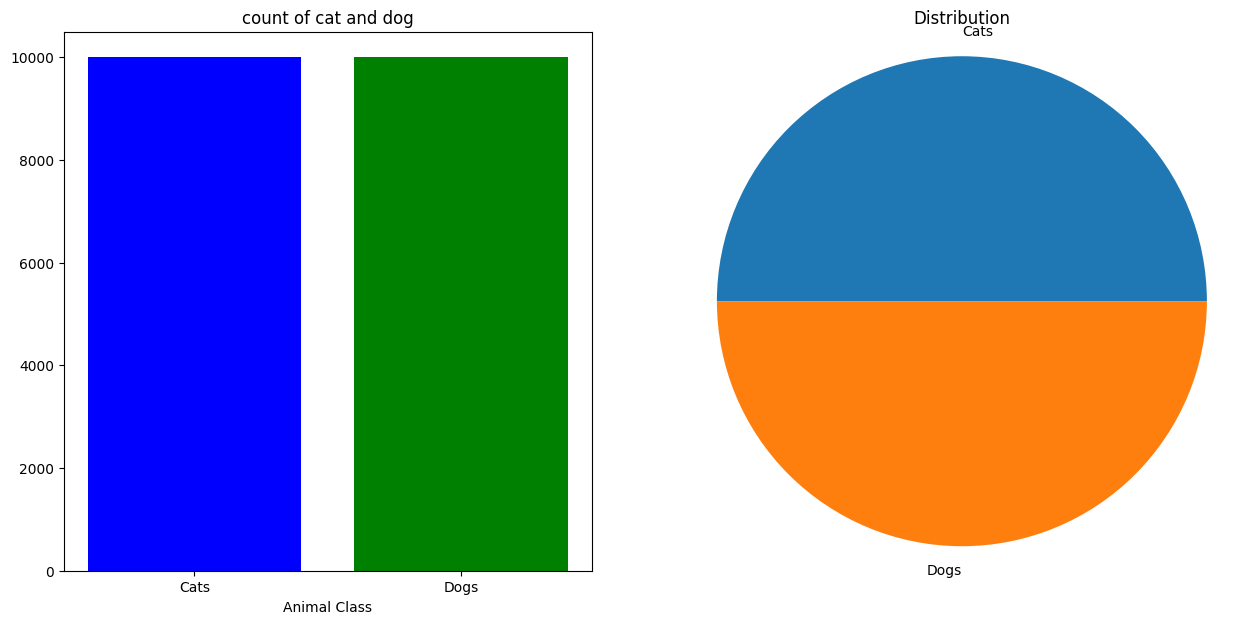

In [6]:
fig , ax = plt.subplots(1,2,figsize=(15,7))

ax[0].bar(classes_animals,count,color=['blue','green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_xlabel('Animal Class')
ax[0].set_title("count of cat and dog")

ax[1].pie(count,labels=classes_animals)
ax[1].set_title('Distribution')
ax[1].axis('equal')

Deleting random and dirty images 

In [7]:
image_exts = ["jpeg","jpg","png"]
data_dir = "D:/Emotion Detection CNN/Data/dogs_vs_cats"

for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            file_type = imghdr.what(file_path)

            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')

            else:
                img = cv2.imread(file_path)
        except Exception as e:
            print(f'Issue wity file {file_path}. Error {e}')
            os.remove(file_path)

    

Laoding shapes and chanels 

In [8]:
def img_to_array(image_path):
    """ reding an image and convert it to a numpy array,
    parameter:
    image_path (str): the path to the file 
    return:
    np.array: the img as numpy array"""

    try:
        with Image.open(image_path) as img:
            image_array = np.array(img)
            return image_array
        
    except IOError:
        print(f"could not read img {file_path}")
        return None

In [9]:
img_to_array("D:/Emotion Detection CNN/Data/dogs_vs_cats/train/dogs/dog.20.jpg")

array([[[137, 148, 105],
        [144, 155, 112],
        [154, 166, 120],
        ...,
        [121, 118,  85],
        [129, 126,  93],
        [132, 129,  96]],

       [[145, 156, 114],
        [150, 161, 119],
        [157, 168, 125],
        ...,
        [131, 127,  98],
        [140, 136, 107],
        [145, 141, 112]],

       [[149, 159, 122],
        [154, 164, 127],
        [159, 170, 130],
        ...,
        [158, 156, 133],
        [164, 162, 139],
        [168, 166, 143]],

       ...,

       [[208, 197, 151],
        [223, 212, 166],
        [235, 227, 178],
        ...,
        [152, 152, 114],
        [137, 137,  99],
        [167, 167, 129]],

       [[211, 200, 154],
        [219, 208, 162],
        [226, 218, 171],
        ...,
        [153, 155, 116],
        [126, 128,  89],
        [148, 150, 111]],

       [[197, 186, 140],
        [201, 193, 146],
        [209, 201, 154],
        ...,
        [163, 165, 126],
        [131, 133,  94],
        [152, 154, 115]]

In [10]:
# Using CV2
image = "D:/Emotion Detection CNN/Data/dogs_vs_cats/train/dogs/dog.20.jpg"
import cv2
img = cv2.imread(image)

if img is not None:
    print(img)
    print(img.shape)

else:
    print("Cannot open")

[[[105 148 137]
  [112 155 144]
  [120 166 154]
  ...
  [ 85 118 121]
  [ 93 126 129]
  [ 96 129 132]]

 [[114 156 145]
  [119 161 150]
  [125 168 157]
  ...
  [ 98 127 131]
  [107 136 140]
  [112 141 145]]

 [[122 159 149]
  [127 164 154]
  [130 170 159]
  ...
  [133 156 158]
  [139 162 164]
  [143 166 168]]

 ...

 [[151 197 208]
  [166 212 223]
  [178 227 235]
  ...
  [114 152 152]
  [ 99 137 137]
  [129 167 167]]

 [[154 200 211]
  [162 208 219]
  [171 218 226]
  ...
  [116 155 153]
  [ 89 128 126]
  [111 150 148]]

 [[140 186 197]
  [146 193 201]
  [154 201 209]
  ...
  [126 165 163]
  [ 94 133 131]
  [115 154 152]]]
(332, 500, 3)


In [11]:
## Using Python

img_pil = Image.open(image)
img_array = np.array(img_pil)

print(img_array)
print(img_array.shape)

[[[137 148 105]
  [144 155 112]
  [154 166 120]
  ...
  [121 118  85]
  [129 126  93]
  [132 129  96]]

 [[145 156 114]
  [150 161 119]
  [157 168 125]
  ...
  [131 127  98]
  [140 136 107]
  [145 141 112]]

 [[149 159 122]
  [154 164 127]
  [159 170 130]
  ...
  [158 156 133]
  [164 162 139]
  [168 166 143]]

 ...

 [[208 197 151]
  [223 212 166]
  [235 227 178]
  ...
  [152 152 114]
  [137 137  99]
  [167 167 129]]

 [[211 200 154]
  [219 208 162]
  [226 218 171]
  ...
  [153 155 116]
  [126 128  89]
  [148 150 111]]

 [[197 186 140]
  [201 193 146]
  [209 201 154]
  ...
  [163 165 126]
  [131 133  94]
  [152 154 115]]]
(332, 500, 3)


# Model Building

In [12]:
base_dir  = "D:/Emotion Detection CNN/Data/dogs_vs_cats/train"

train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'training') 
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'validation') 

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


Getting class labels 

In [13]:
# Accessing class labels for the traing data
train_class_labels = train_generator.class_indices
print("Trainig classs labels = ", train_class_labels)

validation_class_labels = validation_generator.class_indices
print("Trainig classs labels = ", validation_class_labels)

Trainig classs labels =  {'cats': 0, 'dogs': 1}
Trainig classs labels =  {'cats': 0, 'dogs': 1}


Visualizing the batch images 

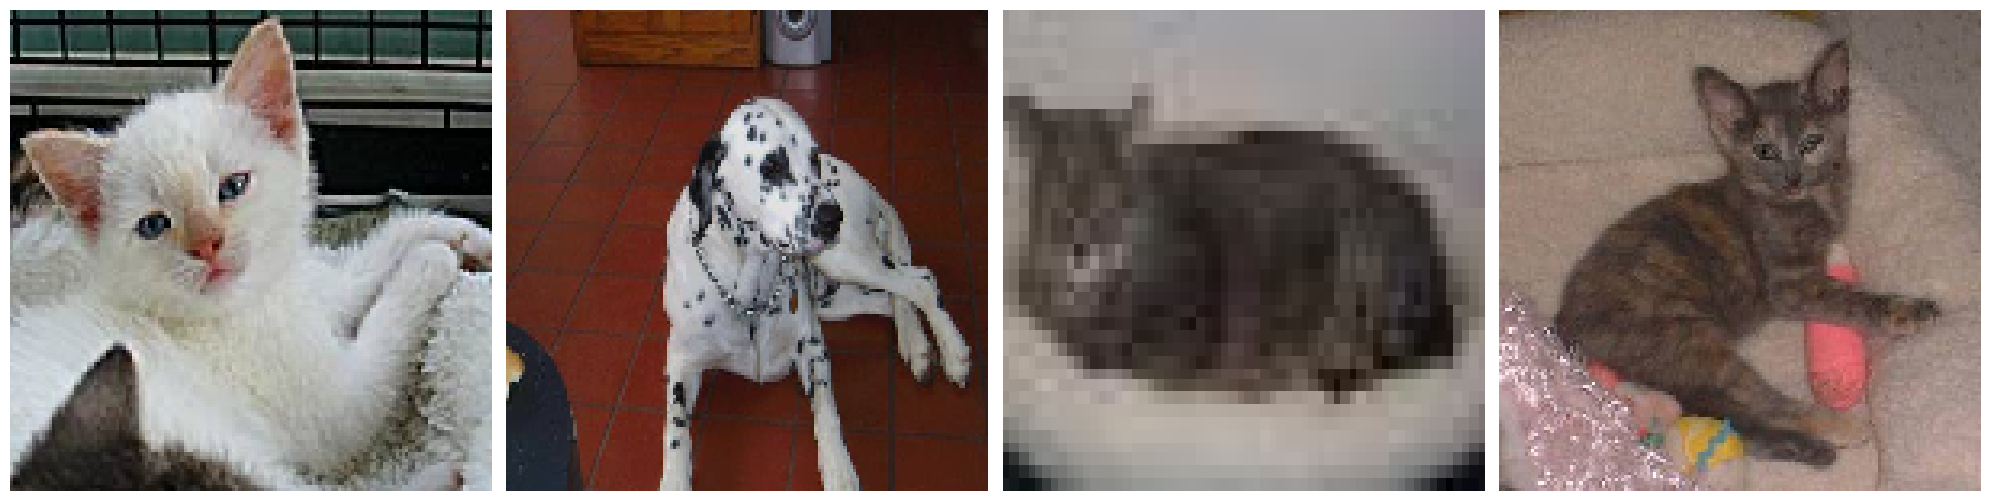

In [14]:
def plot_images_from_generator(generator,num_images = 4):
    images,labels = next(generator)

    fig, axes = plt.subplots(1 ,num_images, figsize = (20,20))
    axes = axes.flatten()

    for img,label, ax in zip(images,labels , axes):
        ax.imshow(img)
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_images_from_generator(train_generator,num_images=4)

# Basic Cnn model

In [15]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

model.summary()

c:\Users\gadha\anaconda3\envs\emo\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
plot_model(model,to_file='Architecture.png',show_shapes = True,show_layer_names = True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


## Parameter Calculation in CNN Layers

### Conv2D Layer

The formula to calculate the number of parameters in a Conv2D layer is:

$$\text{Parameters} = (\text{kernel\_height} \times \text{kernel\_width} \times \text{input\_channels} + 1) \times \text{number\_of\_filters}$$

The "+1" accounts for the bias term for each filter.

#### 1. First Conv2D Layer

- Input shape: (150, 150, 3)
- Number of filters: 32
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 3 + 1) \times 32 = 896$$

#### 2. Second Conv2D Layer

- Input channels: 32 (from the previous Conv2D layer)
- Number of filters: 64
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 32 + 1) \times 64 = 18,496$$

#### 3. Third Conv2D Layer

- Input channels: 64
- Number of filters: 128
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 64 + 1) \times 128 = 73,856$$

#### 4. Fourth Conv2D Layer

- Input channels: 128
- Number of filters: 128
- Filter size: (3, 3)
- Parameters: $$(3 \times 3 \times 128 + 1) \times 128 = 147,584$$

### MaxPooling2D Layer

MaxPooling layers do not have parameters; they only reduce the size of the input they're applied to, based on their pool size and stride.

### Flatten Layer

The Flatten layer itself doesn't have parameters. It simply reshapes the input but does not affect the total parameter count.

### Dense Layer

The formula for a Dense (fully connected) layer is:

$$\text{Parameters} = (\text{input\_size} + 1) \times \text{output\_size}$$

#### 1. First Dense Layer

- Assuming Flatten output size: X (you'll need to calculate this based on the output of the last pooling layer).
- Output size: 512
- Parameters: $$(X + 1) \times 512$$

#### 2. Second Dense Layer

- Input size: 512
- Output size: 1 (for binary classification)
- Parameters: $$(512 + 1) \times 1 = 513$$


In [17]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [18]:
batch = 20
train_steps = np.ceil(train_generator.samples/batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples/batch)
print(train_steps,validation_steps_per_epoch)

800.0 200.0


In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch = 800,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 200
)

Epoch 1/10


c:\Users\gadha\anaconda3\envs\emo\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 114s 141ms/step - accuracy: 0.5583 - loss: 0.6763 - val_accuracy: 0.7340 - val_loss: 0.5359
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


c:\Users\gadha\anaconda3\envs\emo\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


800/800 ━━━━━━━━━━━━━━━━━━━━ 114s 143ms/step - accuracy: 0.7467 - loss: 0.5105 - val_accuracy: 0.7862 - val_loss: 0.4625
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 112s 140ms/step - accuracy: 0.7960 - loss: 0.4270 - val_accuracy: 0.8070 - val_loss: 0.4181
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 112s 140ms/step - accuracy: 0.8464 - loss: 0.3433 - val_accuracy: 0.8480 - val_loss: 0.3437
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 112s 140ms/step - accuracy: 0.8843 - loss: 0.2692 - val_accuracy: 0.8547 - val_loss: 0.3526
Epoch 10/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [20]:
history

In [21]:
history.history

{'accuracy': [0.628250002861023,
  0.0,
  0.7578750252723694,
  0.0,
  0.8101249933242798,
  0.0,
  0.8490625023841858,
  0.0,
  0.8836249709129333,
  0.0],
 'loss': [0.6318000555038452,
  0.0,
  0.4956021010875702,
  0.0,
  0.41114547848701477,
  0.0,
  0.3404112458229065,
  0.0,
  0.2735353410243988,
  0.0],
 'val_accuracy': [0.734000027179718,
  0.7862499952316284,
  0.8069999814033508,
  0.8479999899864197,
  0.8547499775886536],
 'val_loss': [0.5358546376228333,
  0.46248623728752136,
  0.4180525243282318,
  0.3437385857105255,
  0.3525734543800354]}

ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

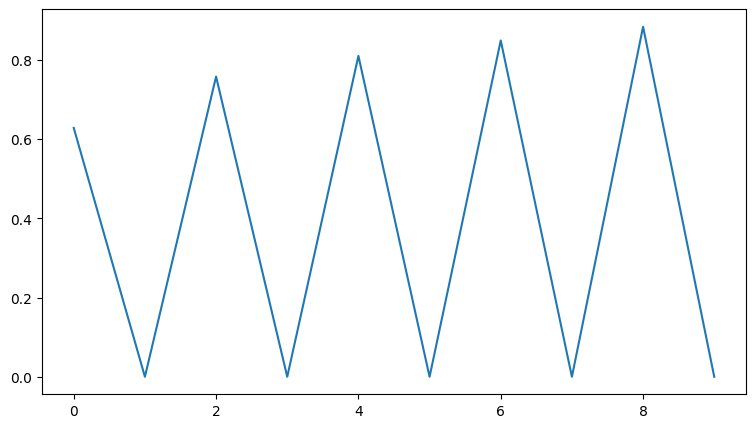

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20,5))

# Plotting training and validation accuracy
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

# Plotting training and validation loss
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()


Model Evaluation


Initializing test generator

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255) 
test_dir = 'D:/Emotion Detection CNN/Data/dogs_vs_cats/test'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary',
    shuffle = False
)

Found 5000 images belonging to 2 classes.


Test prediction

In [28]:
# Reset the test generator
test_generator.reset()

# Get true class labels
True_classes = test_generator.classes

# Calculate the number of steps as an integer
steps = int(np.ceil(test_generator.samples / test_generator.batch_size))

# Get the probabilities from the model
probabilities = model.predict(test_generator, steps=steps)

# Convert probabilities to class predictions for binary classification
predicted_classes = (probabilities > 0.5).astype(int).squeeze()

# Get class labels (assuming binary classification)
class_labels = list(test_generator.class_indices.keys())

# Output the predicted classes and true labels
print(f"True classes: {True_classes}")
print(f"Predicted classes: {predicted_classes}")
print(f"Class labels: {class_labels}")


c:\Users\gadha\anaconda3\envs\emo\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 85s 340ms/step
True classes: [0 0 0 ... 1 1 1]
Predicted classes: [0 0 0 ... 1 1 0]
Class labels: ['cats', 'dogs']


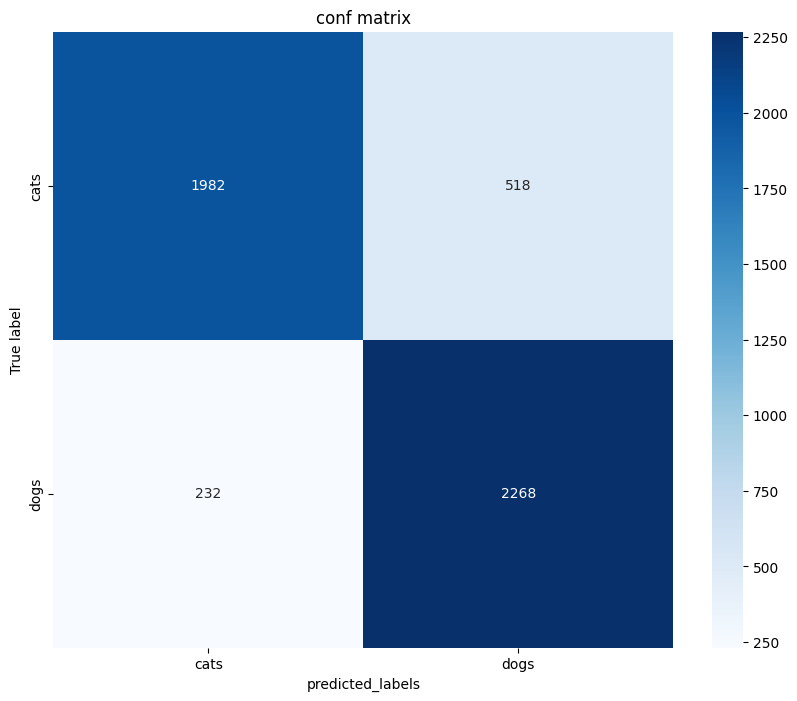

In [29]:
cm = confusion_matrix(True_classes,predicted_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=class_labels,yticklabels=class_labels)
plt.title('conf matrix')
plt.ylabel('True label')
plt.xlabel('predicted_labels')
plt.show()

Inference 

In [32]:
loss,accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.8100 - loss: 0.4661
Test accuracy: 85.00%
Test loss: 0.37


#single image prediction

In [45]:
def make_prediction(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale the image similarly as we did for the training data

    # Make a prediction
    prediction = model.predict(img_array)

    # Display the original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Display the prediction result
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

    # Print the raw prediction values
    print("Raw Prediction:", prediction)


In [47]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model (ensure this model is trained or pre-loaded)
# Assuming the model is a global variable
from keras.models import load_model
model = load_model('path_to_your_model.h5')  # Replace with the correct path to your model

def make_prediction(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale the image similarly as we did for the training data

    # Make a prediction
    prediction = model.predict(img_array)

    # Display the original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Display the prediction result
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

    # Print the raw prediction values
    print("Raw Prediction:", prediction)

# Path to your image
image_path = 'D:\\Emotion Detection CNN\\download.jpeg'

# Call the function with the image path
make_prediction(image_path)


OSError: [Errno 22] Unable to synchronously open file (unable to open file: name = 'path_to_your_model.h5', errno = 22, error message = 'Invalid argument', flags = 0, o_flags = 0)